# Titanic Dataset - Exploratory Data Analysis

In [261]:
# import all the required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# draw plots inside jupyter notebook
%matplotlib inline
plt.figure(figsize=(10, 7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

In [226]:
# read dataset
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 

# Part 1 - Quick Overview of Dataset

In [58]:
# shape of the data -> Row * Column
train.shape

(891, 12)

In [59]:
# datatypes of all the columns or features
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [60]:
# check the null values

train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

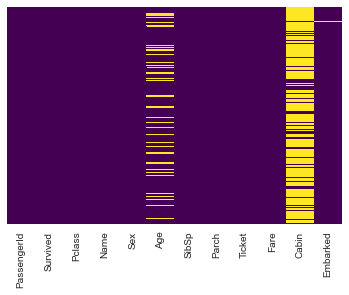

In [61]:
# plot a heat map to get a idea of presence of null values at perticular column

sns.heatmap(train.isnull(), 
            yticklabels= False, 
            cbar = False, 
            cmap='viridis')

#### From above graph, we can clearly see that there are missing values present in Age and Cabin columns.  In Age and Cabin column, approximately 15-20% and almost 90-95% of the data is missing, respectilvely. So we can drop the columns or convert it into 1 or 0 encoding as YES or NO.

<AxesSubplot:xlabel='Survived', ylabel='count'>

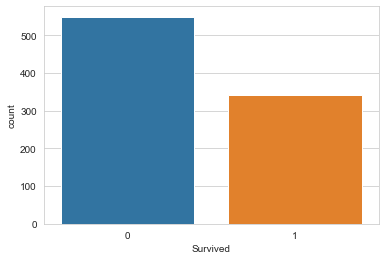

In [22]:
# Quick overview of survived people through graph
sns.set_style('whitegrid')
sns.countplot(x= train['Survived'], 
              data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

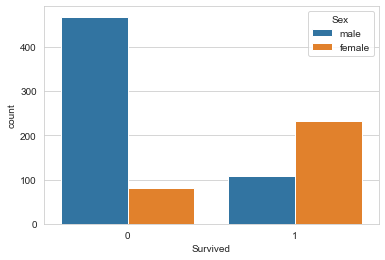

In [23]:
# Quick overview of survived people - Male and Female

sns.countplot(x = train['Survived'],
              hue = train['Sex'],
              data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

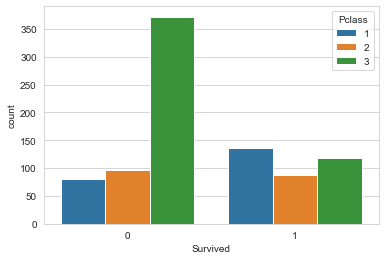

In [27]:
# Quick overview of survived people - Class wise

sns.countplot(x= train['Survived'],
             hue = train['Pclass'],
             data = train)

c:\users\liegion\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

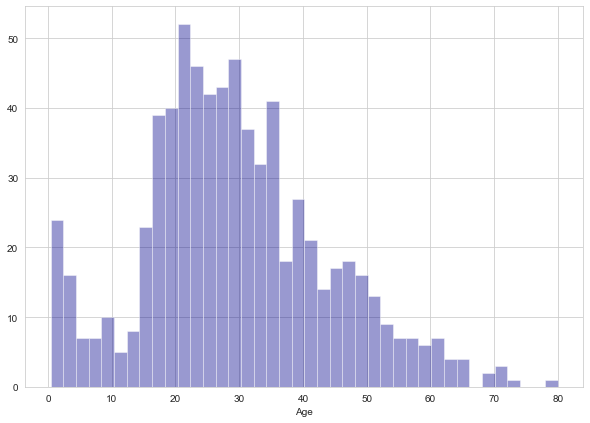

In [47]:
# Quick Overview of Distribution of Age

plt.figure(figsize=(10,7))

#kernal density estimation is false because we don't want guassain distribution curve
sns.distplot(train['Age'].dropna(),
            bins = 40,
            color= 'darkblue',
            kde = False)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

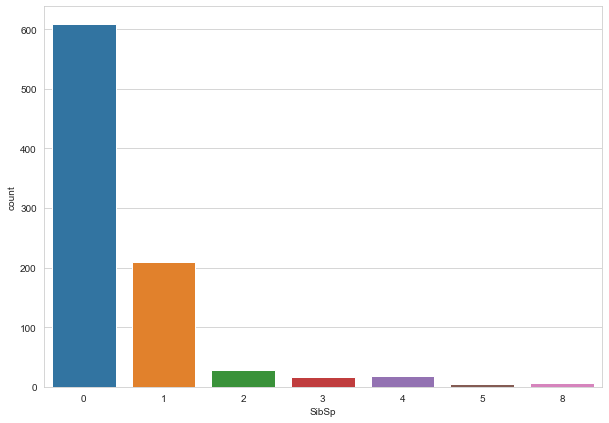

In [64]:
#Quick overview of number of Siblings and Spouse
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')
sns.countplot(x = train['SibSp'],
              data = train)

c:\users\liegion\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

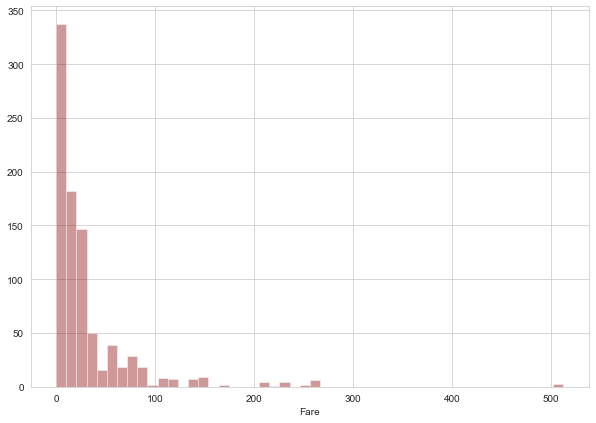

In [67]:
# Quick overview of fair or Price for the ticket
plt.figure(figsize=(10, 7))
sns.distplot(train['Fare'],
            bins = 50,
            kde = False,
            color = 'darkred')

# 

# Part 2.1 - Data Cleaning - Handling Missing Values

### Age and Cabin column has approximate 20% and 90% missing values.

#### Since we are dealing with Age, there are higher chances that, wealthier or old age people often travel in higher class. So we can fill the missing values in Age column with average value of each class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

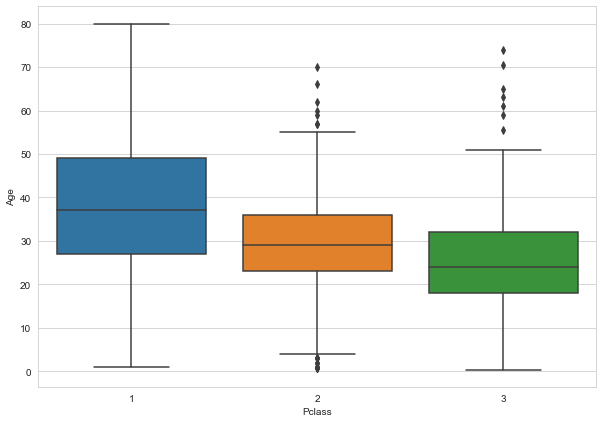

In [227]:
# checking if assumption is true or not through box plot.
# Here, we can clearly see that older people are more likely to travel with high class. 

plt.figure(figsize=(10,7))
sns.boxplot(x= 'Pclass', y = 'Age', data = train)

In [228]:
# Calculate Avg values by class
avg_values_by_Class = train.groupby('Pclass').agg({'Age':['mean']})
avg_values_by_Class

,Age
,mean
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [229]:
# funcrion for take avg Age according to the class.

def Age_calculation(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 25
    else:
        return Age

# Apply above function to the column
train['Age'] = train[['Age', 'Pclass']].apply(Age_calculation, axis = 1)
train['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    25.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

<AxesSubplot:>

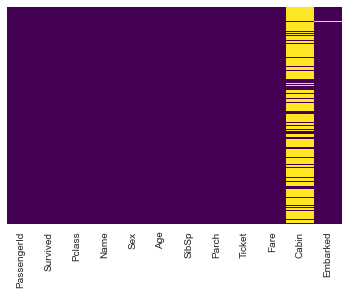

In [230]:
# Again check for the missing values through the visualisation for Age
sns.heatmap(train.isnull(),
            yticklabels= False,
           cmap = 'viridis',
           cbar = False)


In [231]:
# Dropping the Cabin column from main Dataset
# Inplace = True -> it deletes Cabin from Train Dataframe 
train.drop('Cabin', axis=1, inplace= True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [232]:
#checking for Em
train['Embarked'].isna().sum()

2

In [233]:
#dropping those two observations from Dataset
train.dropna(inplace= True)

<AxesSubplot:>

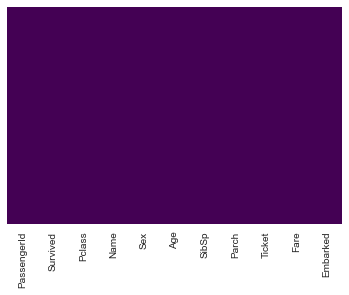

In [234]:
# Final Missing Value check
sns.heatmap(train.isnull(),
           yticklabels=False,
           cbar = False,
           cmap = 'viridis')

# 

# Part 2.2 - Data Cleaning - Converting Catagorical Feature

In [235]:
# Get info about the cleaned Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [236]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [239]:
train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [240]:
# Convert Categorical dumies
Sex = pd.get_dummies(train['Sex'], drop_first=True)
Sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [241]:
# Since there are 3 unique values present in Embarked columns
# we need to first create dummy encoding seperately for Embarked field

Embark= pd.get_dummies(train['Embarked'], drop_first= True)
Embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [242]:
train = pd.concat([train, Sex, Embark], axis = 1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.0,1,2,W./C. 6607,23.4500,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0


# 

# Part 3 - Logistic Regression

In [251]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [244]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [252]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [253]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\liegion\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [254]:
predictions = logmodel.predict(X_test)

In [256]:
accuracy = confusion_matrix(y_test, predictions)

In [257]:
accuracy

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [259]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.8089887640449438

In [260]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [263]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

